#### Importing required Libraries and Packages

In [4]:
#pip install pmdarima

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima  
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from math import sqrt
from sklearn.metrics import mean_squared_error
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Load the dataset

In [6]:
df = pd.read_csv("Competition_data.csv")

print(df.shape)
df.head()

(486, 2)


,Date,Close
0,1/1/2023 23:58:00,448.08
1,1/2/2023 23:58:00,448.08
2,1/3/2023 23:58:00,448.55
3,1/4/2023 23:58:00,449.01
4,1/5/2023 23:58:00,449.53


#### Exploratory Data Analysis (EDA)

- ###### Checking for the null values in the column from the dataset

In [7]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

- ###### Checking for duplicate value in the dataset

In [8]:
df.duplicated().sum()

0

- ###### Checking the datatypes of column in the dataset

In [9]:
df.dtypes

Date      object
Close    float64
dtype: object

- ###### Getting the summary of various descriptive statistics for the numeric column in the dataset

In [10]:
df.describe()

,Close
count,486.000000
mean,801.034228
std,341.494007
min,448.080000
25%,461.500000
50%,772.105000
75%,895.500000
max,1630.660000


#### Data Preprocessing and Visualization

- ###### Convert `Date` column to datetime type

In [11]:
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

- ###### Setting `Date` column to index

In [12]:
df.set_index("Date", inplace = True)

df.head()

,Close
Date,
2023-01-01 23:58:00,448.08
2023-01-02 23:58:00,448.08
2023-01-03 23:58:00,448.55
2023-01-04 23:58:00,449.01
2023-01-05 23:58:00,449.53


- ###### Plotting line graph for the time series

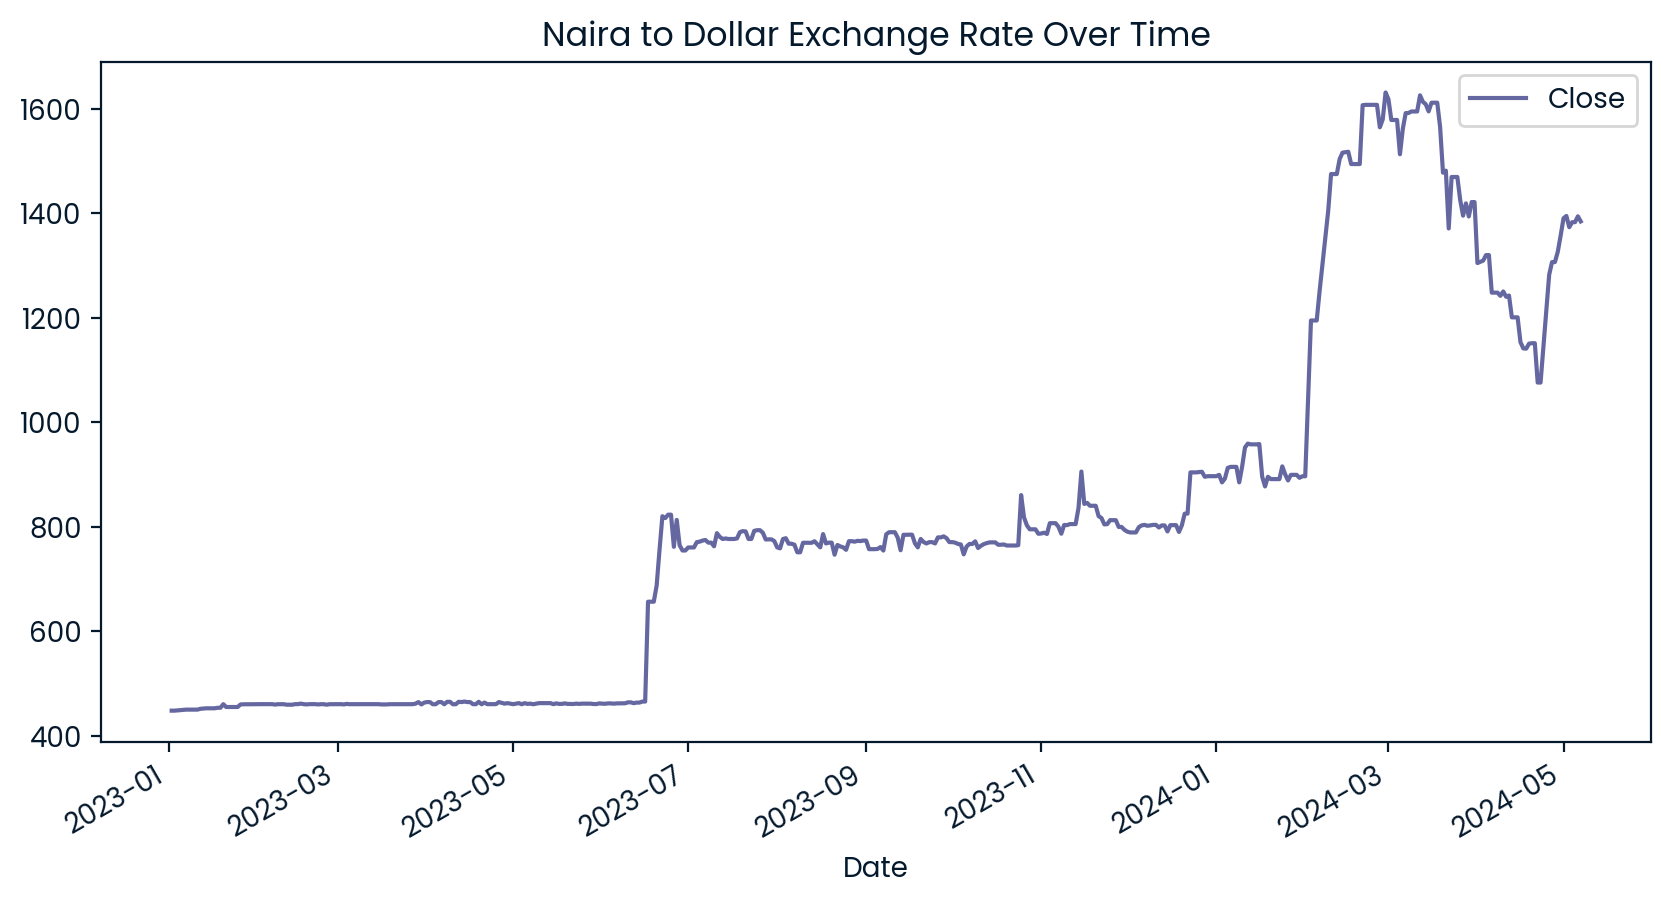

In [14]:
df.plot(figsize = (10,5))
plt.title('Naira to Dollar Exchange Rate Over Time')
plt.show()

- ###### Resampling the dataset to weekly frequency

In [15]:
df_week = df.resample('W').mean()
print('Count of The Weekly Data Frame : ',df_week.shape[0])
df_week.head()

Count of The Weekly Data Frame :  72


,Close
Date,
2023-01-01,448.080000
2023-01-08,449.331429
2023-01-15,451.661429
2023-01-22,455.065714
2023-01-29,458.745714


- ###### Plotting the line graph to show the data trend in the weekly resampled dataset

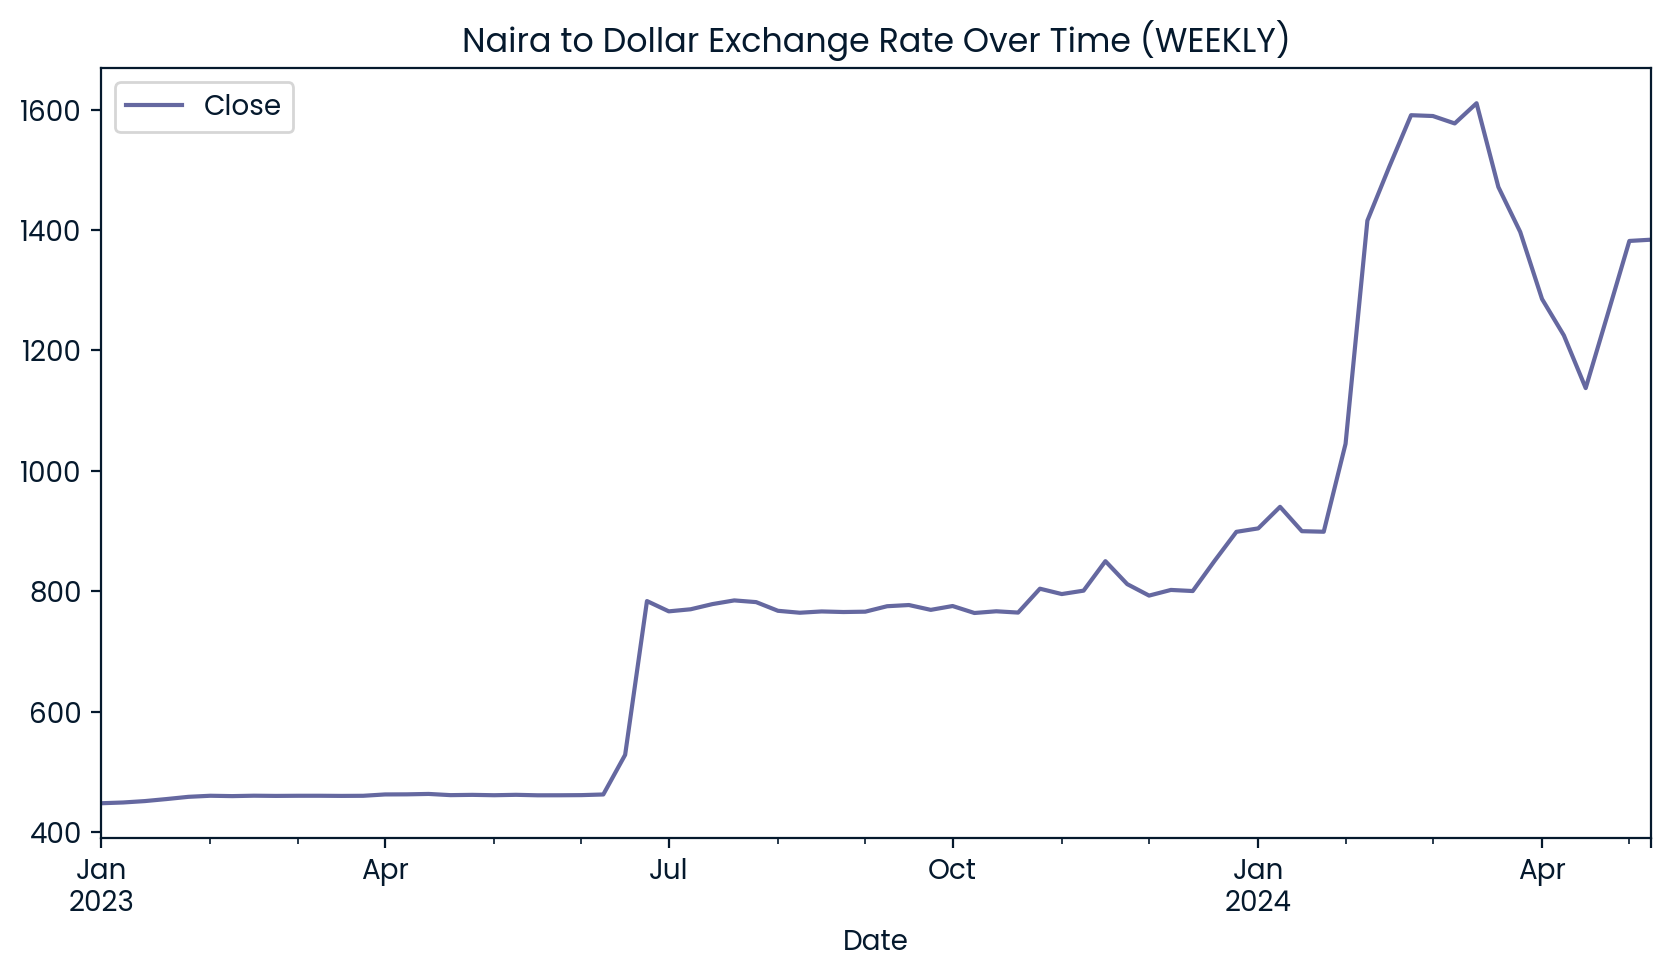

In [16]:
df_week.plot(figsize = (10,5))
plt.title('Naira to Dollar Exchange Rate Over Time (WEEKLY)')
plt.show()

- ###### Resampling the dataset to monthly frequency

In [17]:
df_month = df.resample('M').mean()
print('Count of The Monthly Data Frame : ',df_month.shape[0])
df_month.head()

Count of The Monthly Data Frame :  17


,Close
Date,
2023-01-31,453.956129
2023-02-28,460.327857
2023-03-31,460.807419
2023-04-30,462.480667
2023-05-31,461.501935


- ###### Plotting the line graph to show the data trend in the monthly

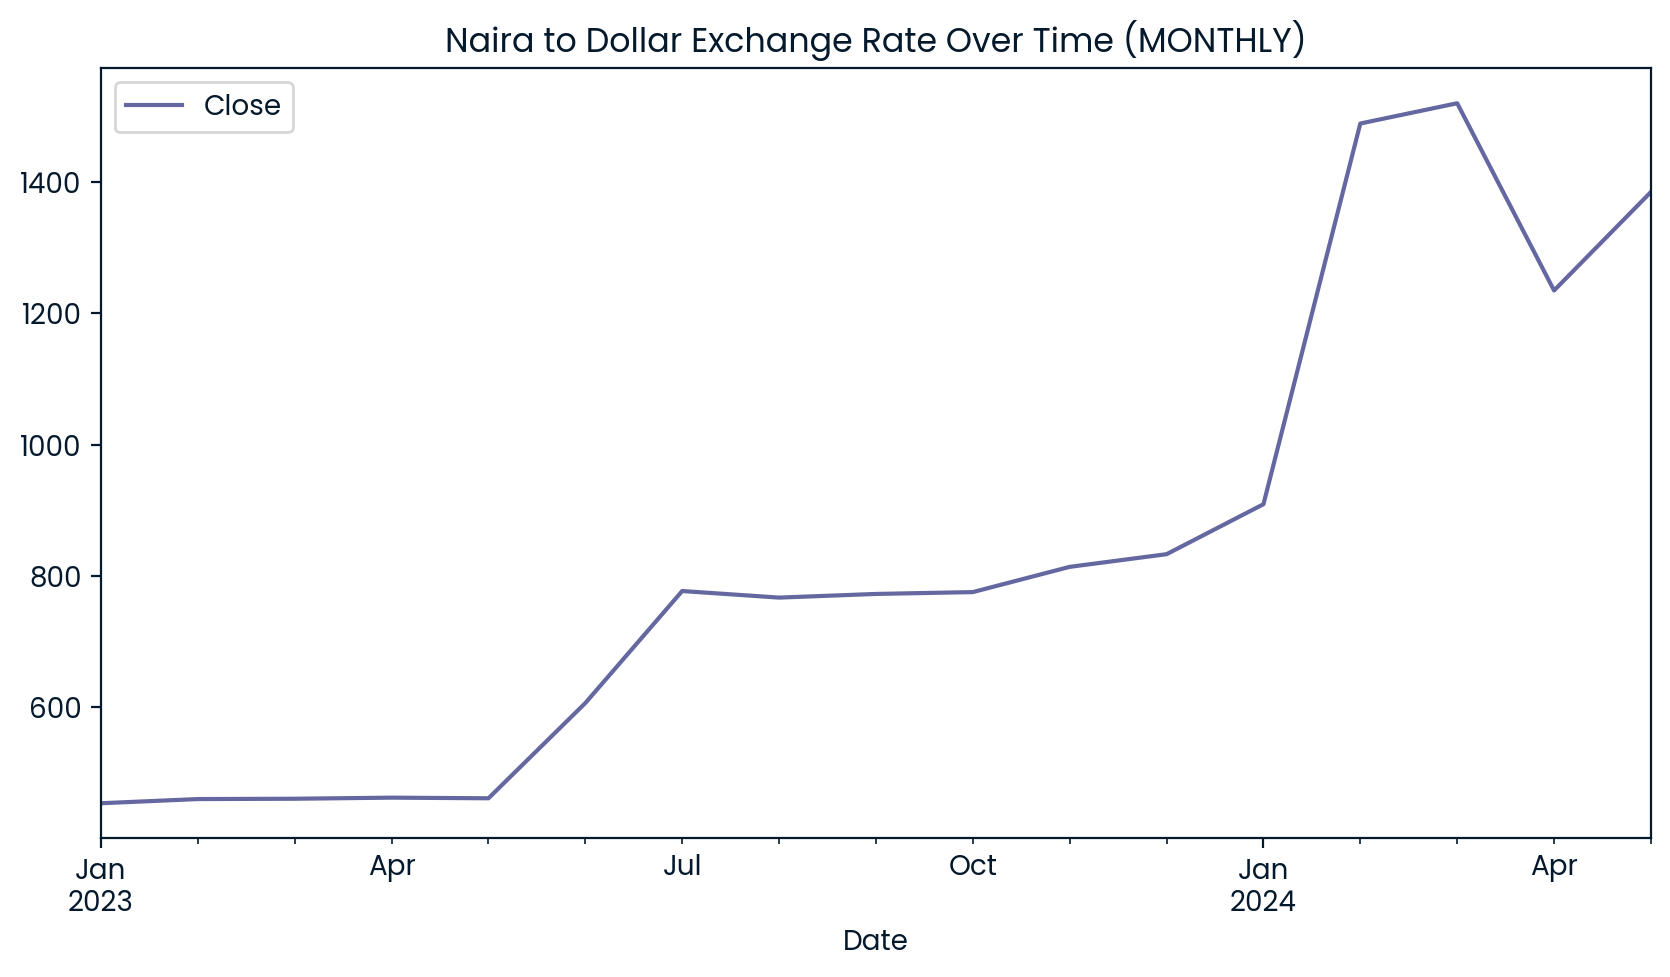

In [18]:
df_month.plot(figsize = (10,5))
plt.title('Naira to Dollar Exchange Rate Over Time (MONTHLY)')
plt.show()

- ###### Resampling the dataset to yearly frequency

In [19]:
df_year = df.resample('Y').mean()
print('Count of The Yearly Data Frame : ',df_year.shape[0])
df_year.head()

Count of The Yearly Data Frame :  2


,Close
Date,
2023-12-31,638.386548
2024-12-31,1286.310910


- ###### Plotting the line graph to show the data trend in the yearly resampled dataset

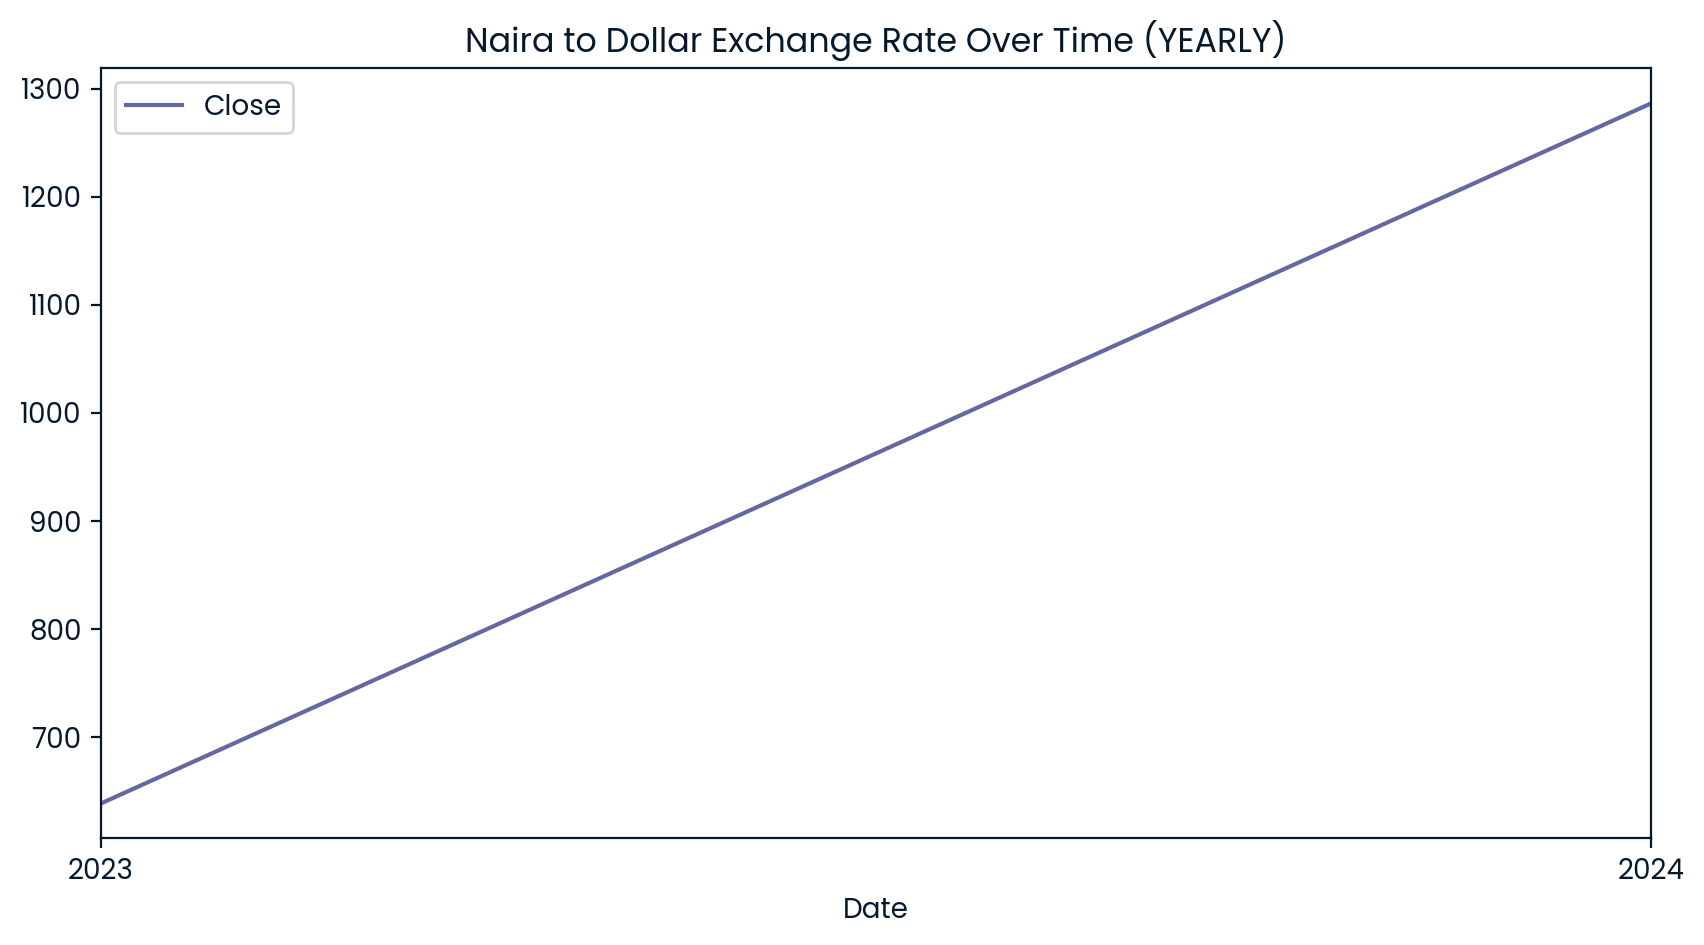

In [20]:
df_year.plot(figsize = (10,5))
plt.title('Naira to Dollar Exchange Rate Over Time (YEARLY)')
plt.show()

- ###### Plotting the scatter plot to show the data trend

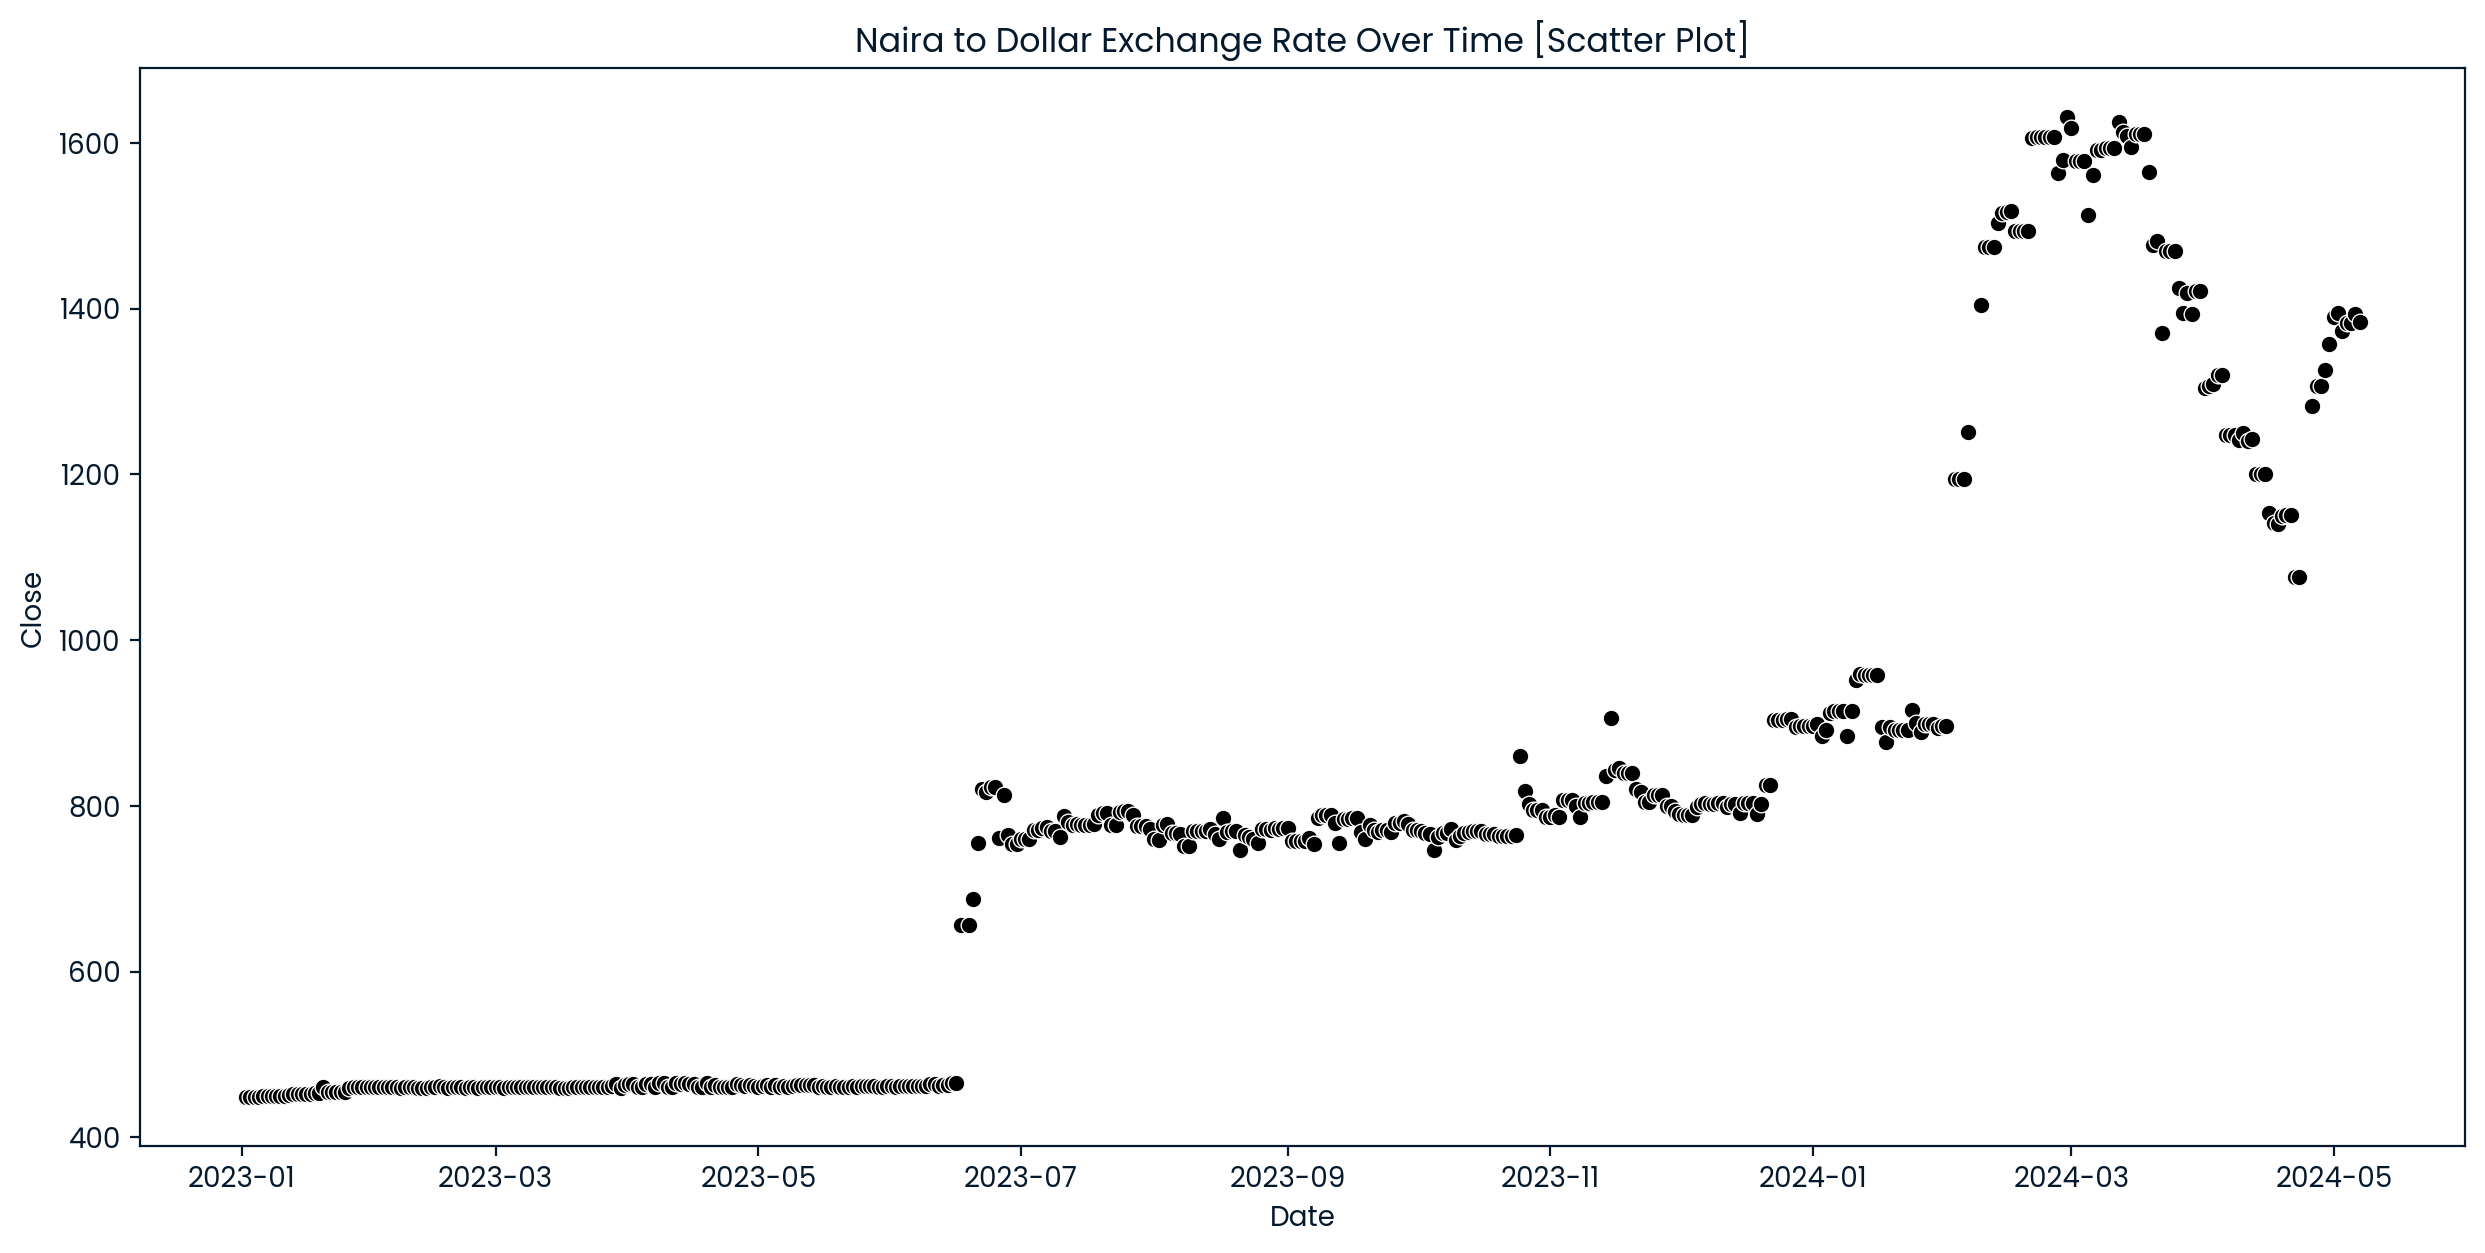

In [22]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = df.index , y = df.Close , color = 'black')
plt.title('Naira to Dollar Exchange Rate Over Time [Scatter Plot]')
plt.show()

- ###### Plotting the dist plot of data spread

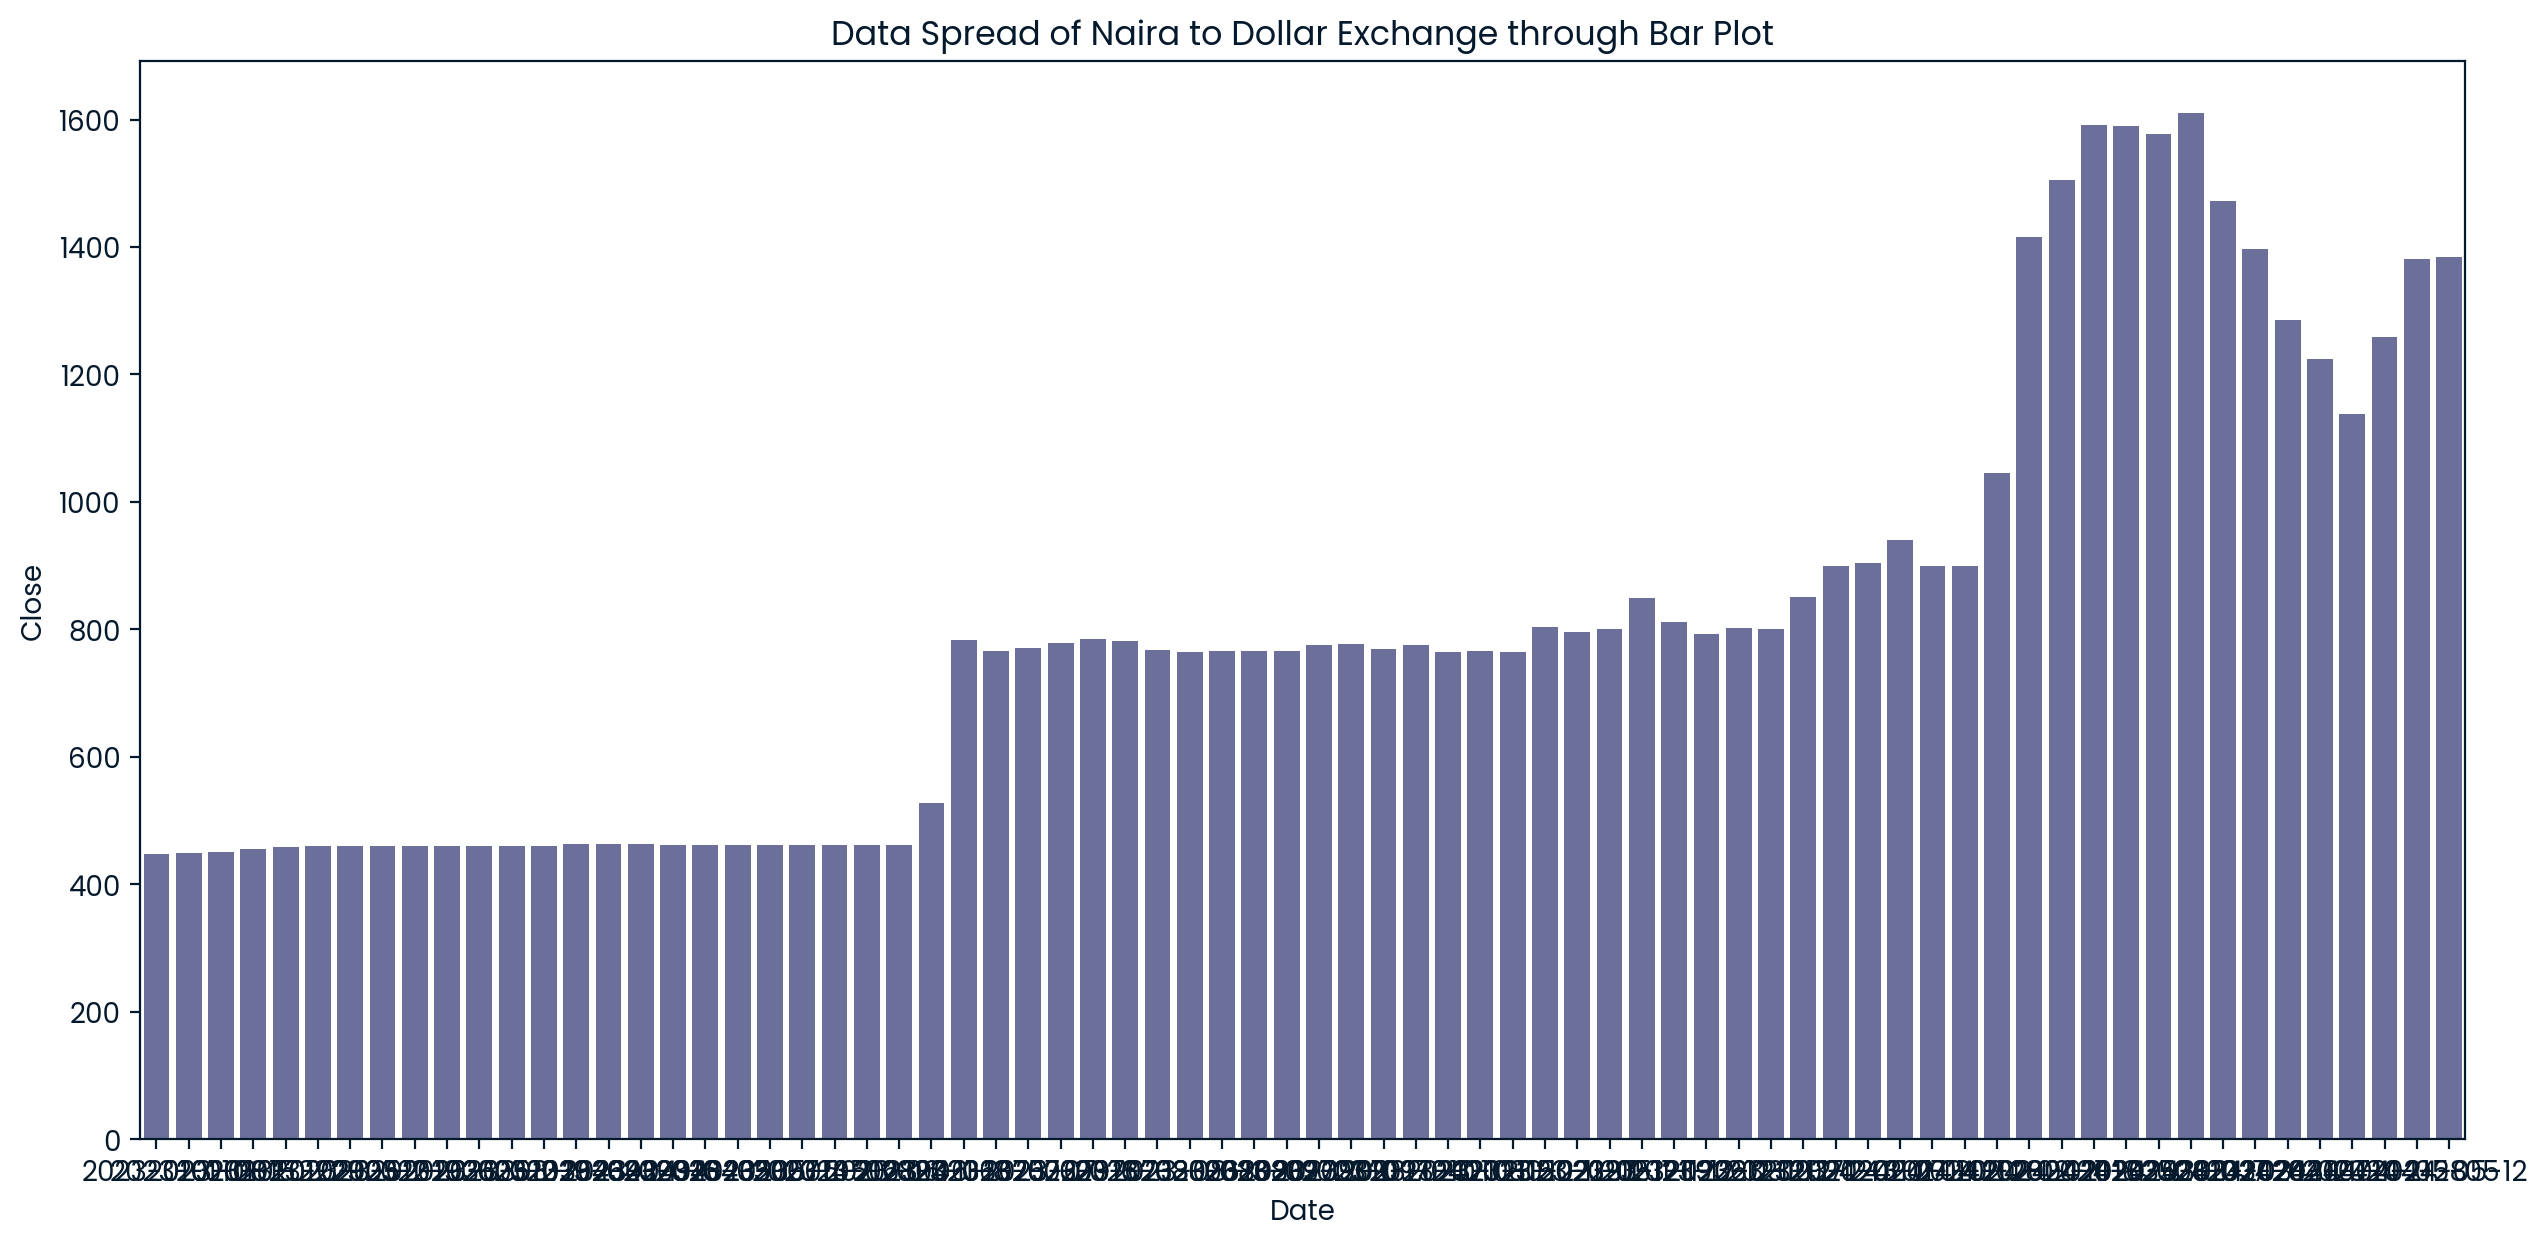

In [24]:
sns.barplot(data = df_week,x = df_week.index , y = df_week.Close)
plt.title('Data Spread of Naira to Dollar Exchange through Bar Plot')
plt.show()

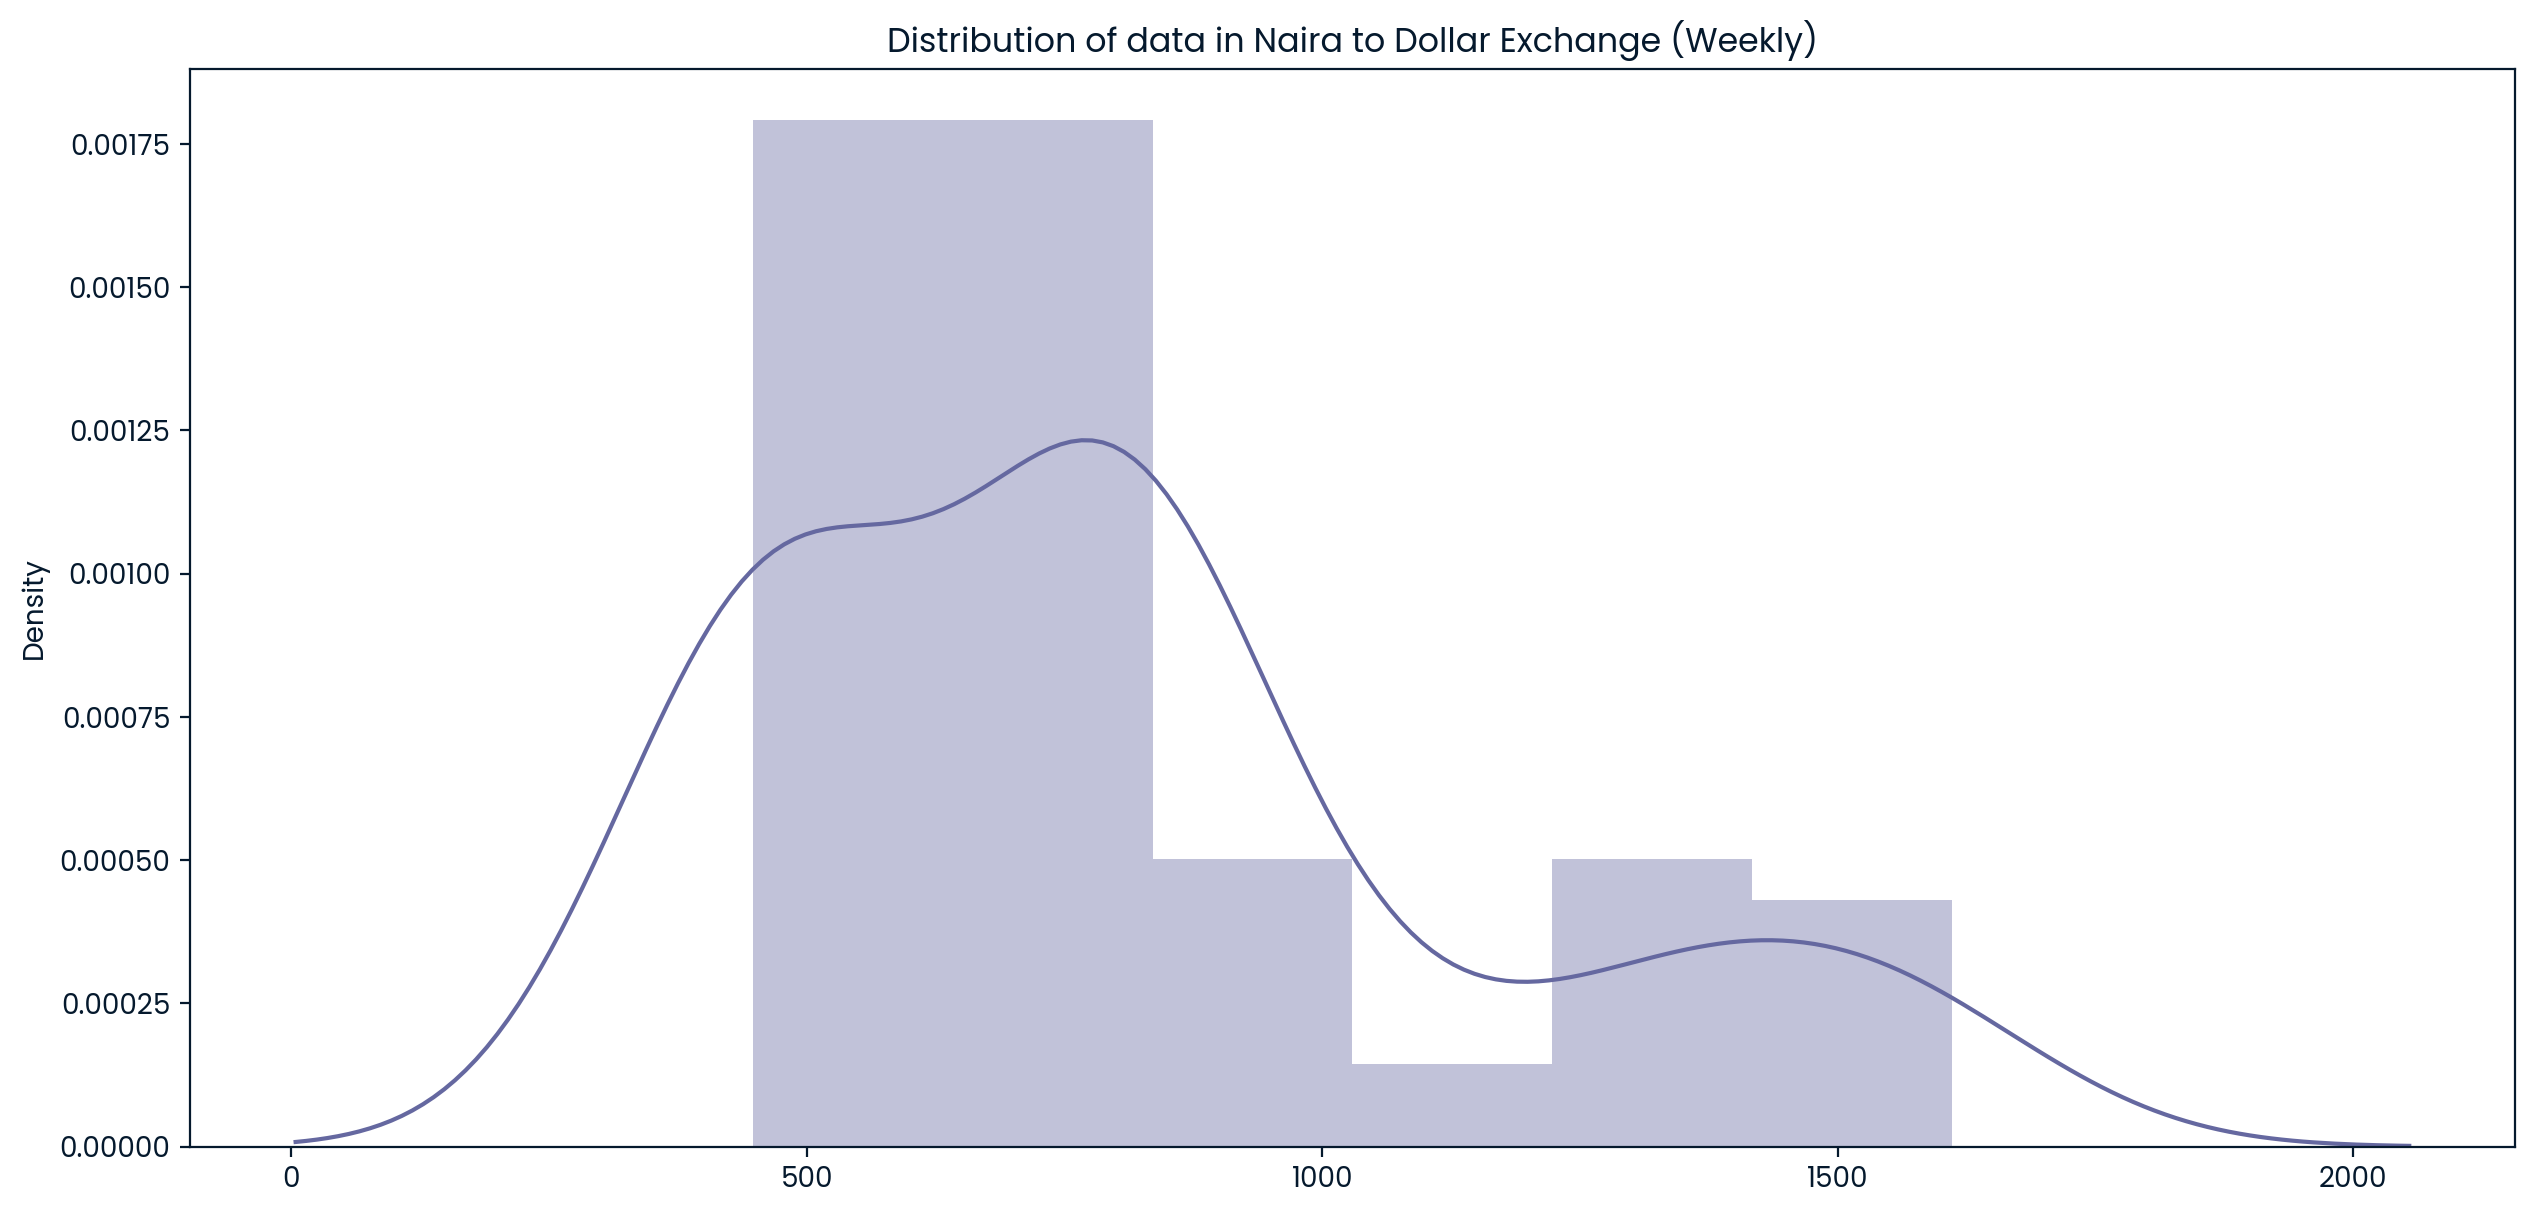

In [25]:
sns.distplot(df_week)
plt.title('Distribution of data in Naira to Dollar Exchange (Weekly)')
plt.show()

- ###### Plotting the graph with Seasonal Decomposition function to show the data discription ,trend , seasonal and residuals

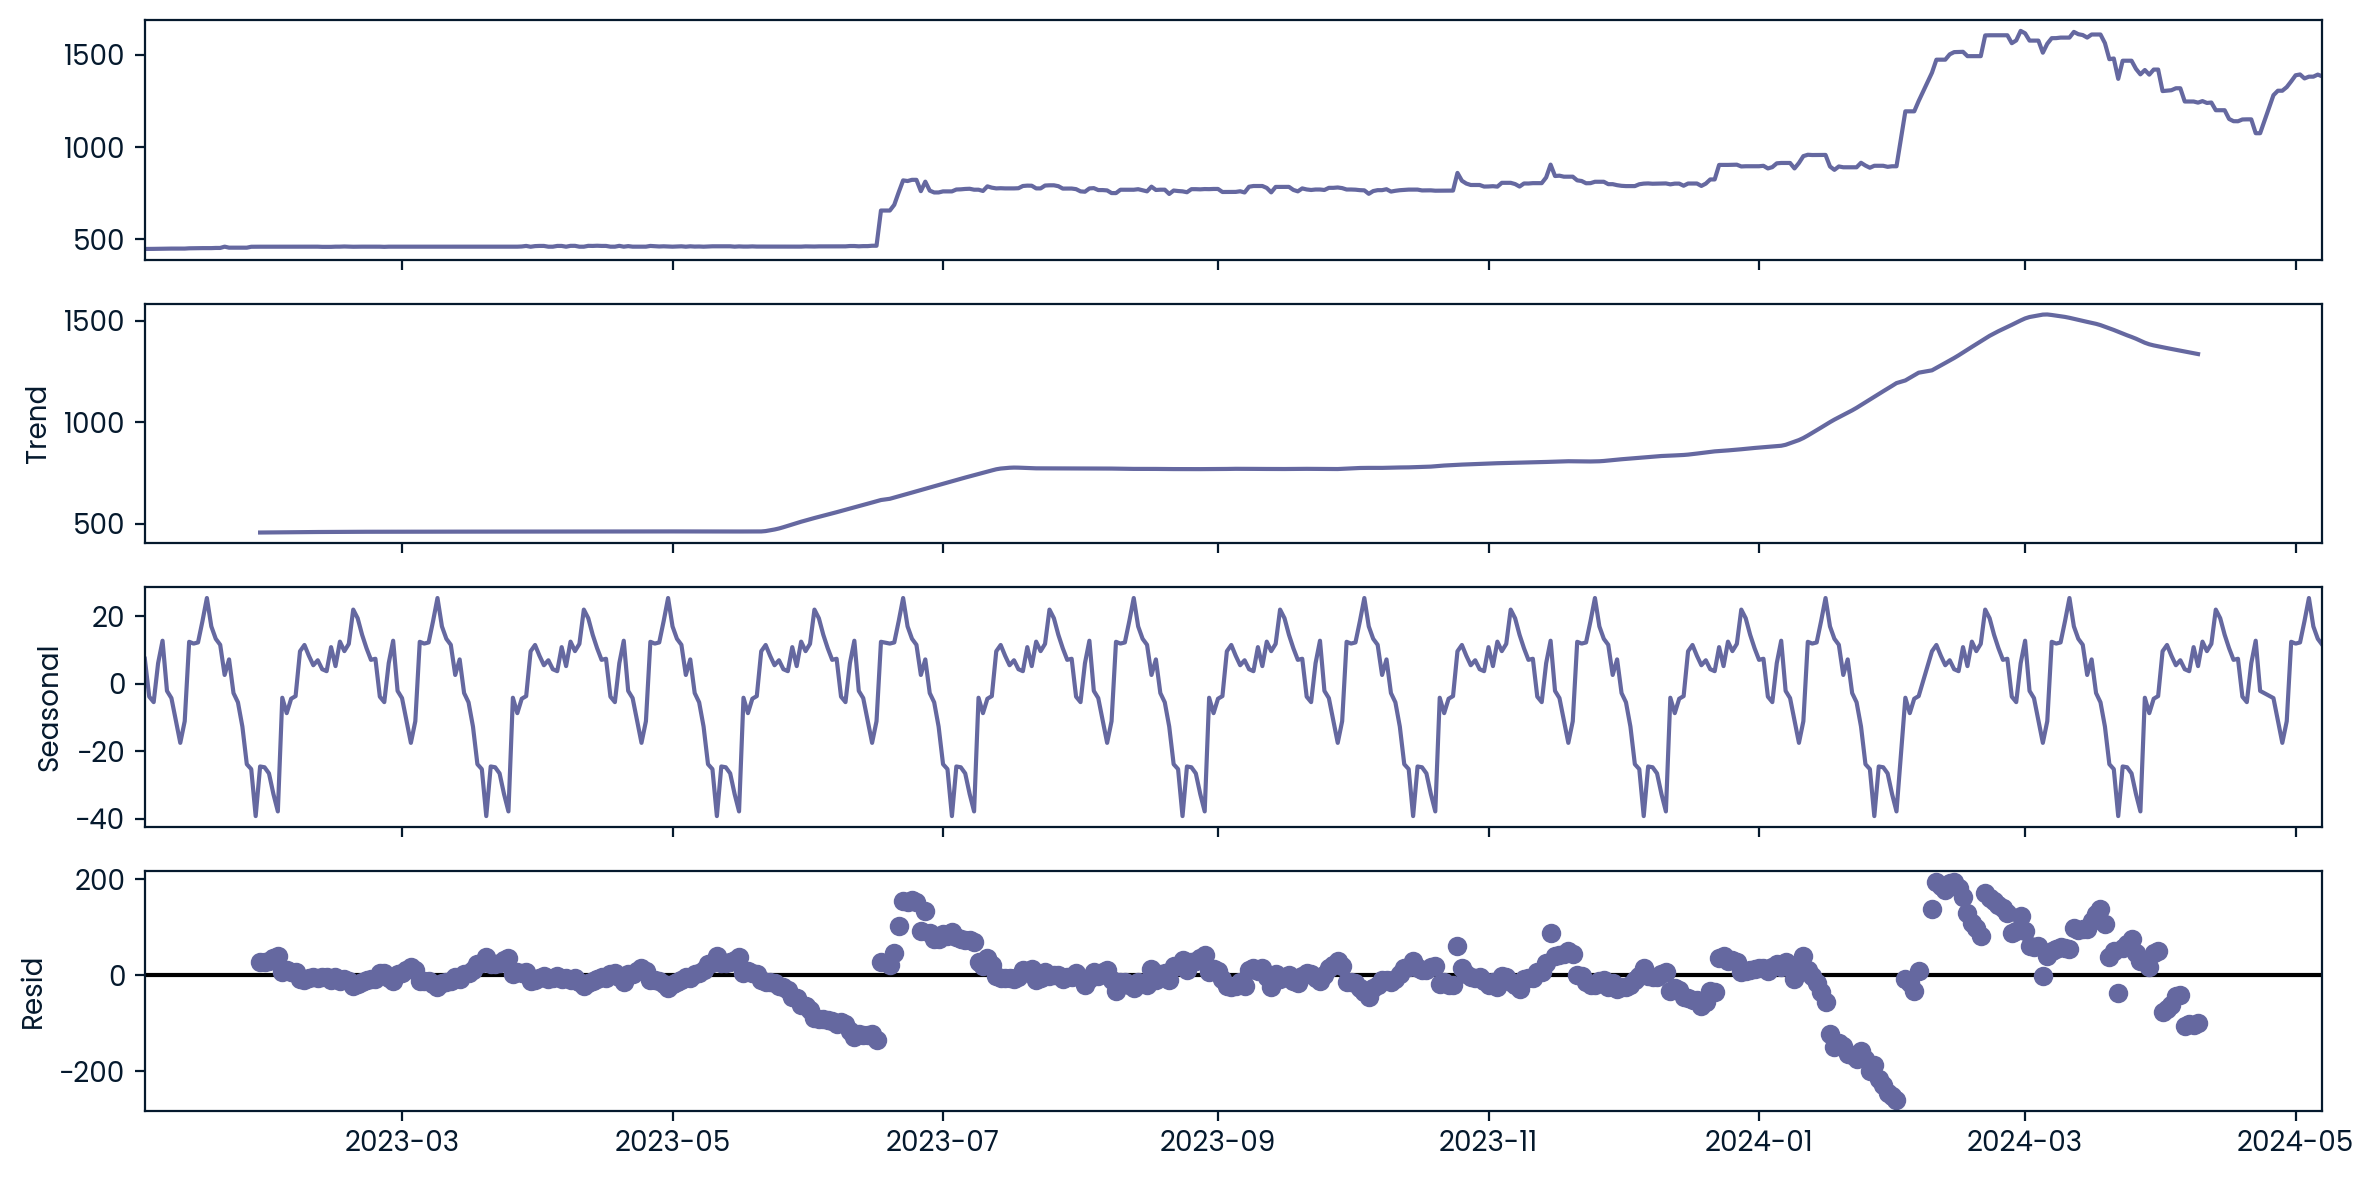

In [30]:
plt.rcParams['figure.figsize']=(12,6)
decomposition = seasonal_decompose(df, period = 52, model = 'additive')
decomposition.plot()
plt.show()

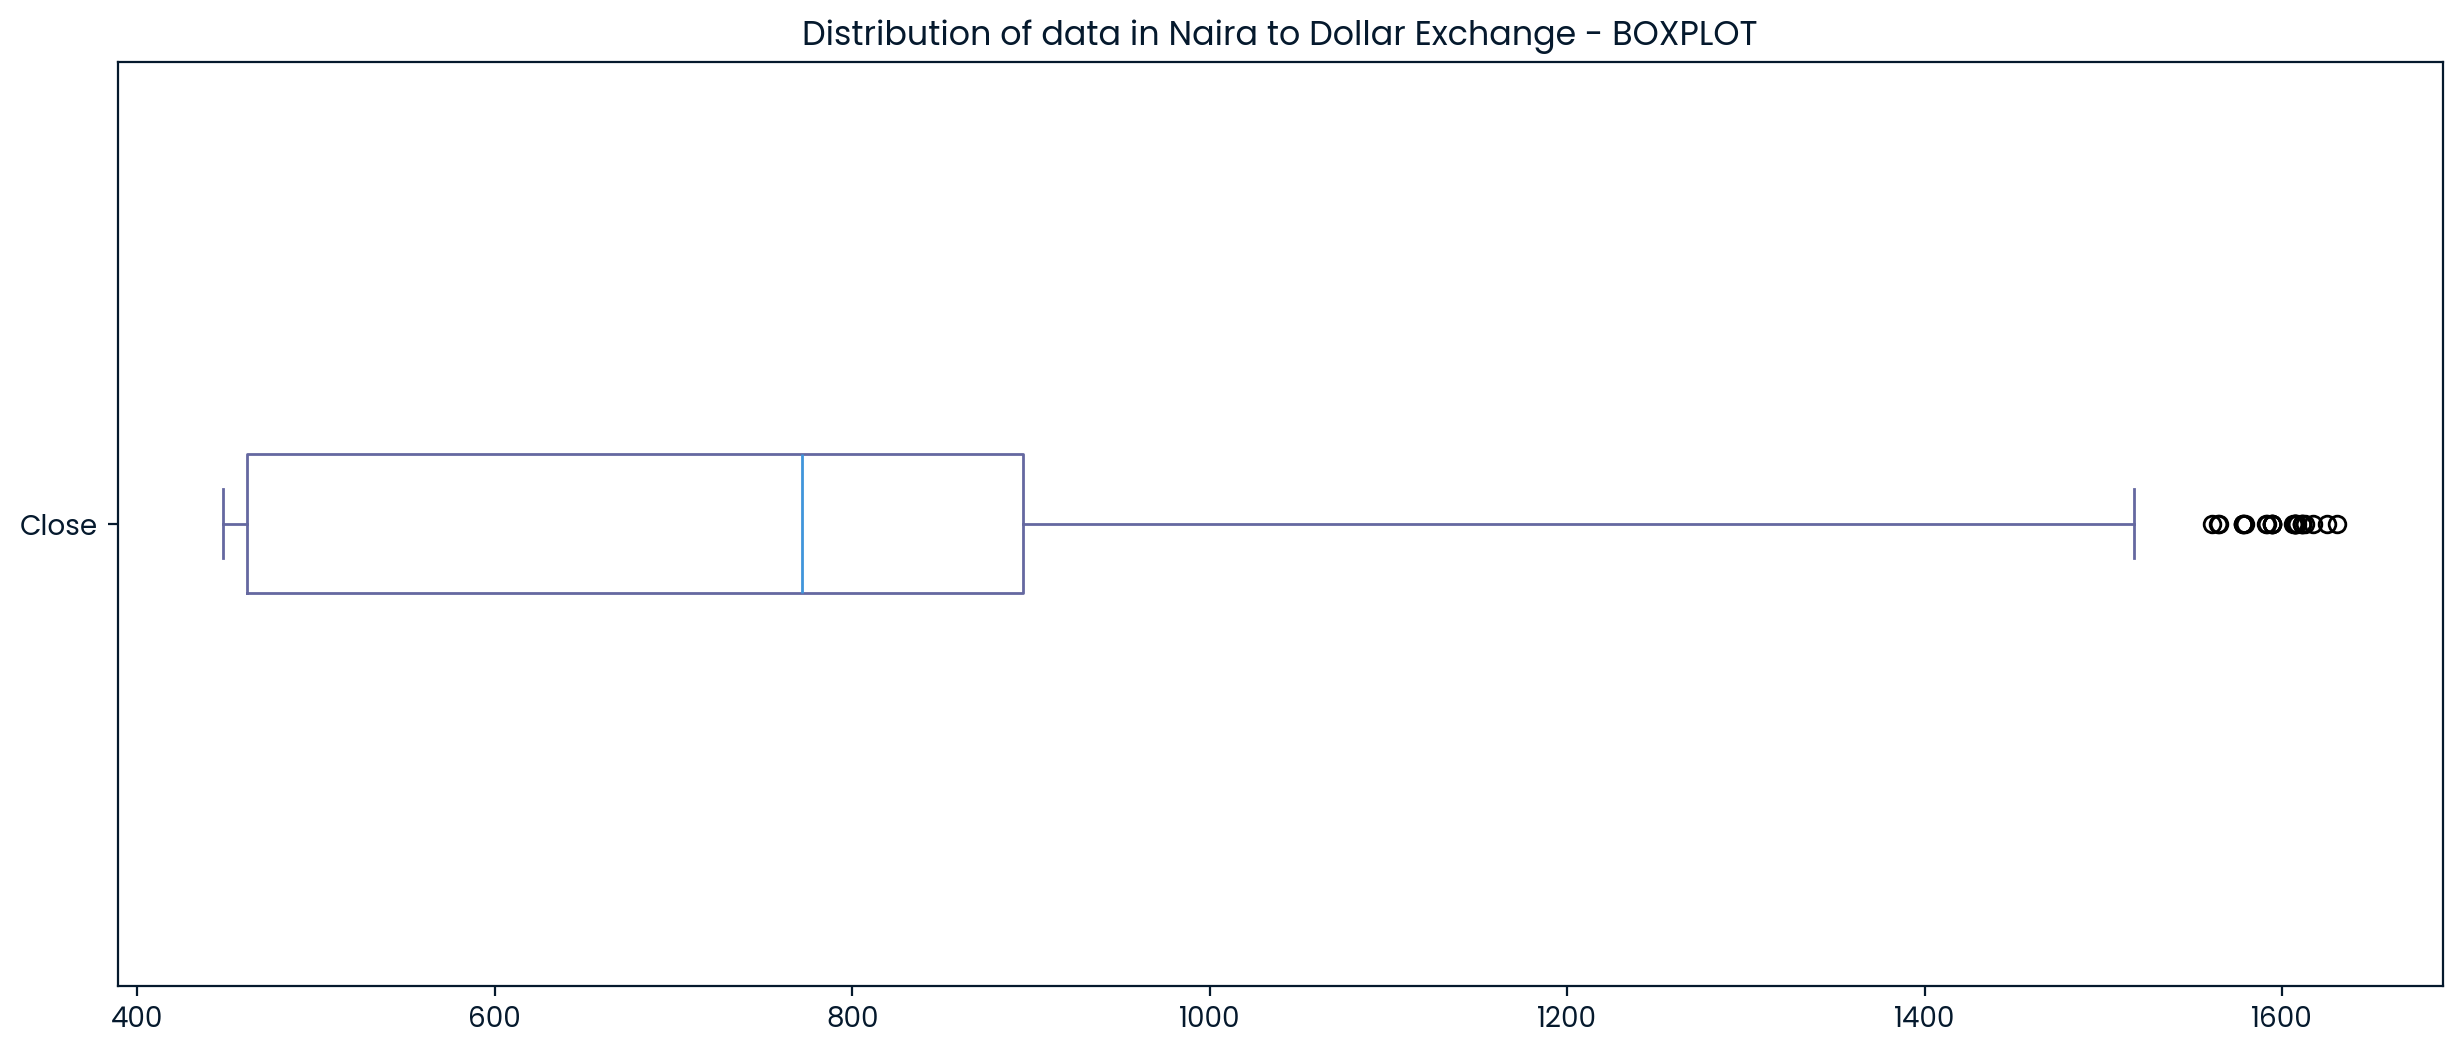

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Close"].plot(kind="box", vert=False, title="Distribution of data in Naira to Dollar Exchange - BOXPLOT", ax=ax);

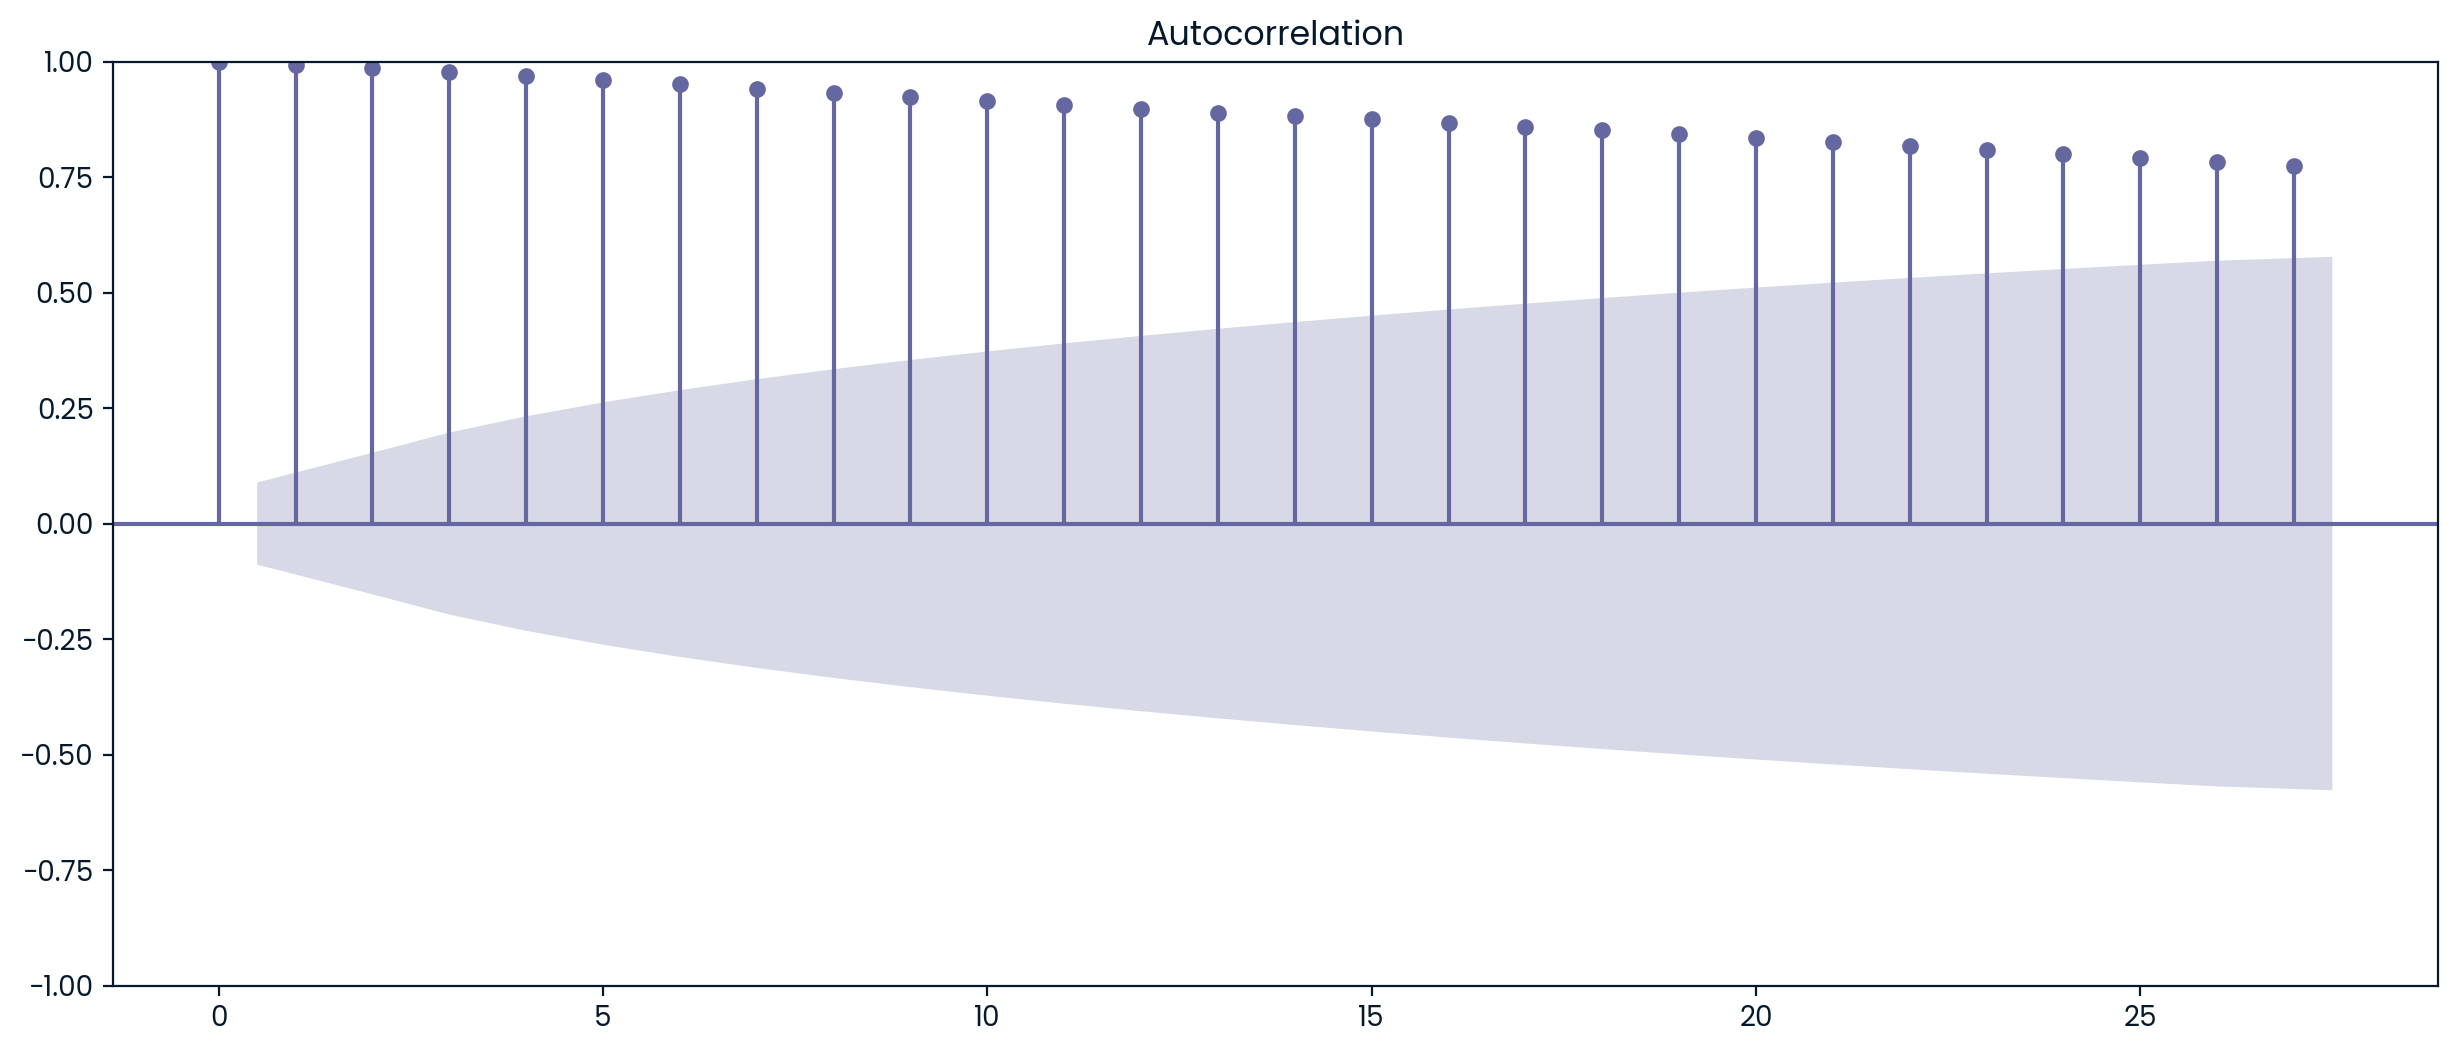

In [32]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df, ax=ax)
plt.title("Autocorrelation");

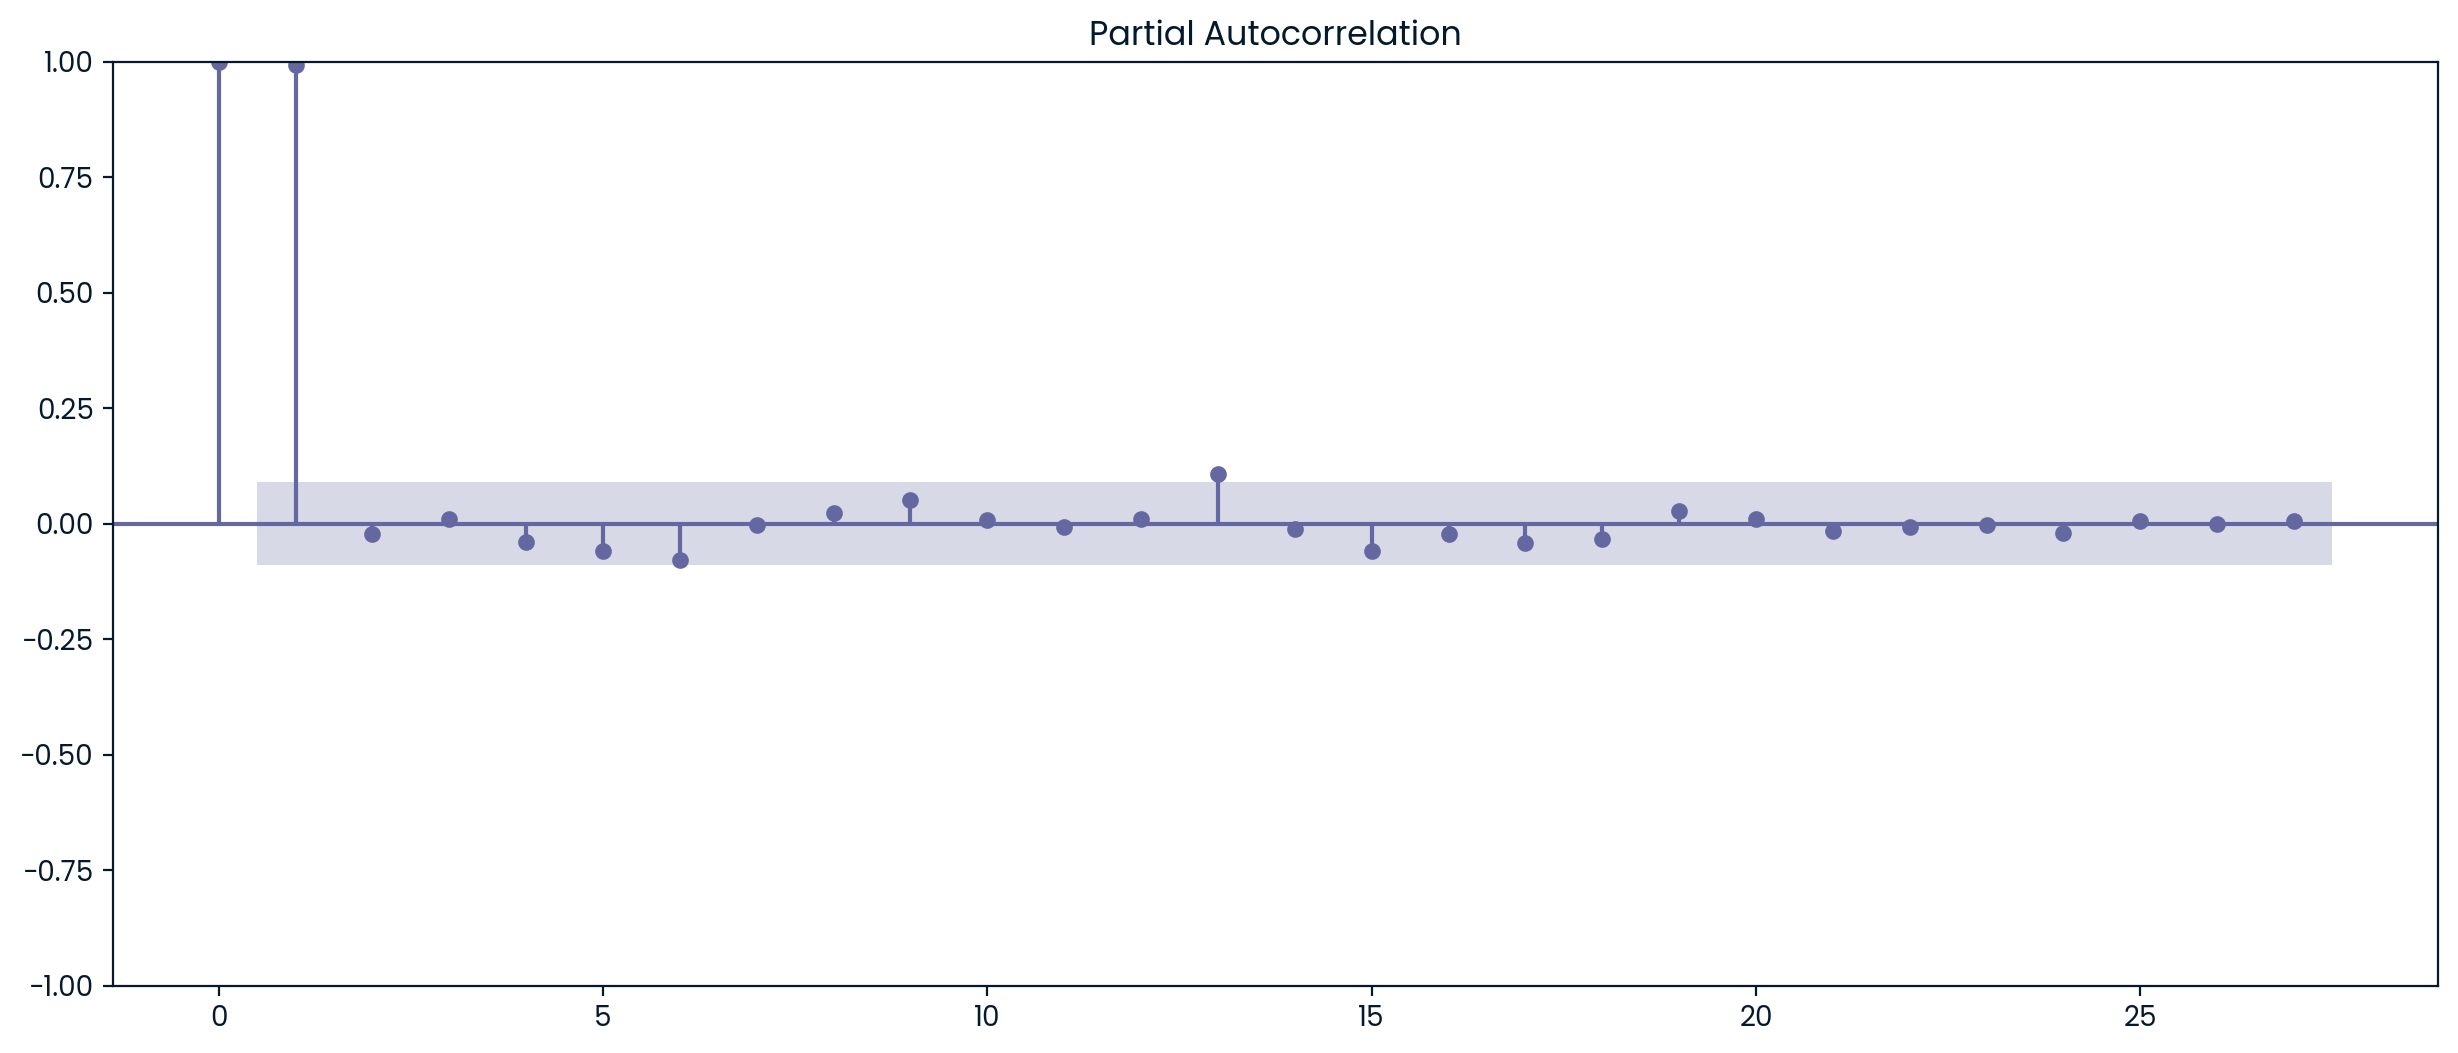

In [33]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df, ax=ax)
plt.title("Partial Autocorrelation");

## Splitting Dataset

In [34]:
print(len(df))
int(len(df) * 0.95)

486


461

In [ ]:
cutoff_test = int(len(df) * 0.95)

y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

len(y_train) + len(y_test) == len(y)